# Nombre d'accidents par Année pour la France et la Seine Maritime
# Nombre d'accidents par régions
# Nombre par type d'accidents par An

In [ ]:
# Connexion a google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
# liste des fichiers disponibles
!ls "/content/drive/MyDrive/Accidents/datas/Regroupement"

drive = True
path = "/content/drive/MyDrive/Accidents/"
pathData = "/content/drive/MyDrive/Accidents/datas/Regroupement/"

Accidents_2005_to_2023.csv			 df_SeineMaritime_Accidents_2005_2023.csv
caracteristiques_2005_to_2023.csv		 fusion_usagers_2005_to_2023.csv
caracteristiques_2005_to_2023_step1.csv		 fusion_usagers_France_2005_to_2023.csv
caracteristiques_2005_to_2023_step2.csv		 fusion_usagers_Seine_Maritime_2005_to_2023.csv
Caracteristiques_lieux_2005_to_2023.csv		 lieux_2005_to_2023.csv
Caracteristiques_lieux_Usagers_2005_to_2023.csv  usagers_2005_to_2023.csv
Caracteristiques_Usagers_2005_to_2023.csv	 usagers_2023.csv
df_France_Accidents_2005_2023.csv		 vehicules_2005_to_2023.csv


In [ ]:
# Importation librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
#from xplotter.insights import *

sns.set_style('whitegrid')

# pour ne pas imprimer les warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataset correspondance région département France
correspondance_departement_region = pd.read_csv(path + 'departments_regions_france.csv', sep=',')

# Chargement dataset Global
df_caracteristiques =pd.read_csv(pathData + 'caracteristiques_2005_to_2023_step1.csv', sep=',',low_memory=False)



In [ ]:
# Transformation du dataset correspondance région départements
# Remplissage des valeurs vides
correspondance_departement_region.regionName = correspondance_departement_region.regionName.fillna("")
correspondance_departement_region.regionCode = correspondance_departement_region.regionCode.fillna(0)
# Conversion en numérique
correspondance_departement_region['regionCode'] = correspondance_departement_region['regionCode'].astype(int)

In [ ]:
# Nombre de lignes et colonnes
df_caracteristiques.shape


(1187862, 18)

In [ ]:
# Coup d'oeil au dataset
correspondance_departement_region.head()

,departmentCode,departmentName,regionCode,regionName
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur


In [ ]:
correspondance_departement_region['departmentCode'] = correspondance_departement_region['departmentCode'].str.upper()

In [ ]:
# Renommer la colonne 'departmentCode' en 'dep'
correspondance_departement_region = correspondance_departement_region.rename(columns={'departmentCode': 'dep'})

In [ ]:
# Liste des départements
correspondance_departement_region.dep.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974', '976', '987', '988'], dtype=object)

In [ ]:
# Stocker les deux départements de la corse
df_caracteristiques_corse = list(df_caracteristiques.loc[(df_caracteristiques.dep == '2A') & (df_caracteristiques.dep == '2B'),'Num_Acc'])

In [ ]:
# Supprimer les deux départements de la corse dans le dataset d'origine

In [ ]:
df_caracteristiques.dep.unique()

array([75. , 94. , 95. , 93. , 92. ,  1. , 38. , 91. , 22. ,  6. , 67. ,
       56. , 20. , 82. , 11. , 63. , 47. , 39. , 29. , 26. , 60. , 45. ,
       64. , 16. ,  7. , 17. , 23. , 87. , 30. , 34. , 62. , 66. , 83. ,
       69. , 33. , 80. , 13. , 78. , 76. , 74. , 71. , 72. , 61. , 86. ,
       70. , 65. , 44. , 54. , 53. , 59. , 85. , 57. , 28. , 37. , 52. ,
       51. , 49. , 88. , 10. , 36. , 35. , 31. , 27. , 84. , 21. ,  8. ,
        2. , 81. , 77. , 14. , 50. , 42. ,  9. , 15. , 73. , 32. ,  4. ,
       58. , 68. , 55. , 41. , 43. , 25. ,  5. , 12. , 19. , 79. , 40. ,
       18. ,  3. , 46. , 90. , 24. , 89. , 48. , 20.1, 20.2])

In [ ]:
# Conversion Corse en 20
# A corriger, problème double des accidents pour la corse
correspondance_departement_region['dep'].mask(correspondance_departement_region['dep'] == '2A', '20' , inplace=True )
correspondance_departement_region['dep'].mask(correspondance_departement_region['dep'] == '2B', '20' , inplace=True )

In [ ]:
correspondance_departement_region.head(100)

,dep,departmentName,regionCode,regionName
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
95,95,Val-d'oise,11,Ile-de-France
96,971,Guadeloupe,1,Guadeloupe
97,972,Martinique,2,Martinique
98,973,Guyane,3,Guyane


In [ ]:
# fusion
correspondance_departement_region = correspondance_departement_region.astype({'dep':'float'})
fusion = df_caracteristiques.merge(correspondance_departement_region, on='dep', how='left')
caracteristiques = fusion.copy()

In [ ]:
# Coup d'oeil au dataset
fusion.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,col,adr,lat,long,gps,com_insee_temp,com_insee,departmentName,regionCode,regionName
0,202300000001,7,5,2023,06:00,1,75.0,75101,2,4,...,7.0,RUE DE RIVOLI,"48,86638600","2,32347100",NaN,75.075101,75101,Paris,11.0,Ile-de-France
1,202300000002,7,5,2023,05:30,5,94.0,94080,2,1,...,6.0,Avenue de Paris,"48,84547782","2,42868146",NaN,94.094080,94080,Val-de-Marne,11.0,Ile-de-France
2,202300000003,7,5,2023,20:50,1,94.0,94022,2,3,...,1.0,Avenue du Général Leclerc,"48,76240000","2,40655000",NaN,94.094022,94022,Val-de-Marne,11.0,Ile-de-France
3,202300000004,6,5,2023,23:57,5,94.0,94078,2,1,...,5.0,Rue de Paris,"48,73248432","2,44687575",NaN,94.094078,94078,Val-de-Marne,11.0,Ile-de-France
4,202300000005,7,5,2023,00:50,5,94.0,94068,2,2,...,3.0,56bis Avenue Raspail,"48,78581000","2,49217000",NaN,94.094068,94068,Val-de-Marne,11.0,Ile-de-France


In [ ]:
# Nombre d'accidents par région
df_count=pd.DataFrame({'Count': fusion["regionName"].value_counts().sort_values(ascending = False)})
df_count.head(40)

,Count
regionName,
Ile-de-France,356480
Auvergne-Rhône-Alpes,110904
Nouvelle-Aquitaine,105756
Provence-Alpes-Côte d'Azur,103933
Nord-Pas-de-Calais-Picardie,97093
Occitanie,90941
Grand-Est,77941
Bretagne,48271
Pays de la Loire,47955


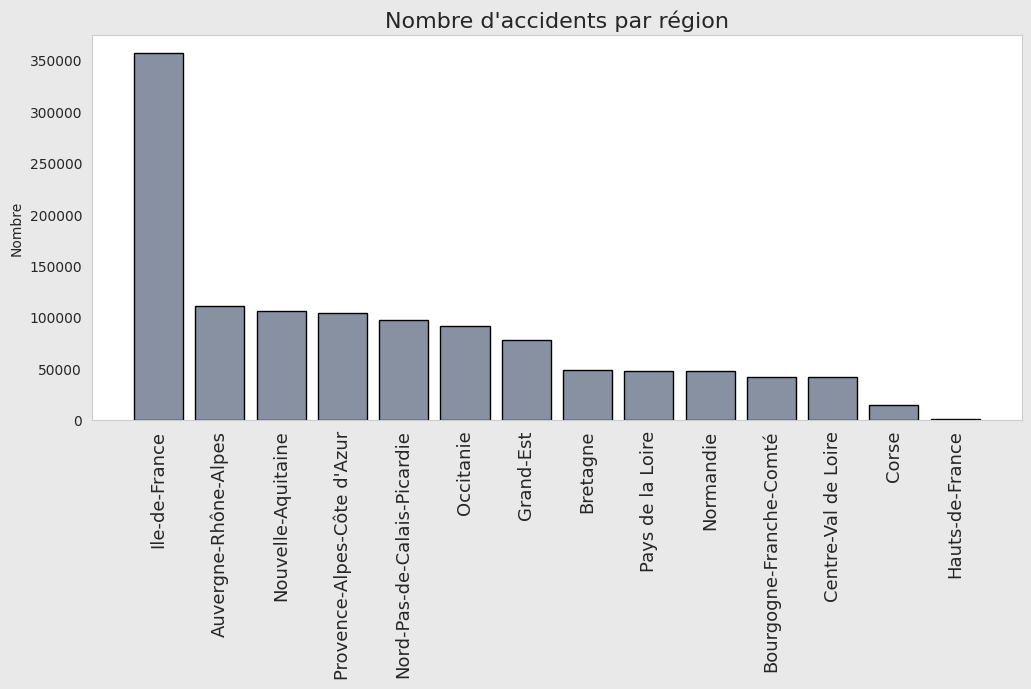

In [ ]:
label=list(df_count.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre d'accidents par région",size=16)
plt.bar(range(0,len(label)),df_count["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Nombre d'accidents par an
df_count_par_accident=pd.DataFrame({'Count': fusion["an"].value_counts().sort_index(ascending=True)})
df_count_par_accident.head(40)

,Count
an,
2005,84995
2006,80719
2007,81672
2008,74876
2009,72637
2010,67598
2011,65369
2012,60719
2013,57083


In [ ]:
# Sauvegarde
# Sauvegarde des Accidents pour les années 2005 à 2023
fusion.to_csv(pathData + 'Accidents_France_2005_to_2023.csv', index=False)

TypeError: '_Feature' object is not callable

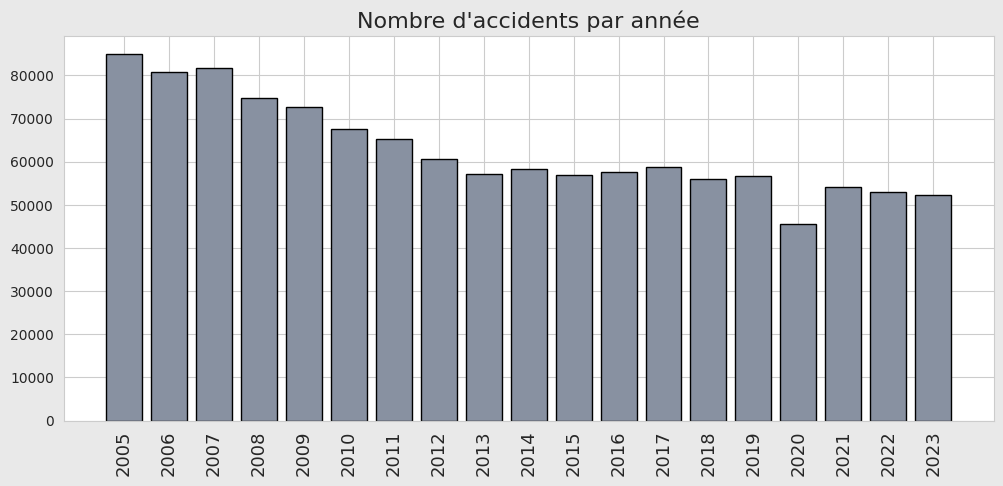

In [ ]:
label=list(df_count_par_accident.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre d'accidents par année",size=16)
plt.bar(range(0,len(label)),df_count_par_accident["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)

plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
fusion.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,col,adr,lat,long,gps,com_insee_temp,com_insee,departmentName,regionCode,regionName
0,202300000001,7,5,2023,06:00,1,75.0,75101,2,4,...,7.0,RUE DE RIVOLI,"48,86638600","2,32347100",NaN,75.075101,75101,Paris,11.0,Ile-de-France
1,202300000002,7,5,2023,05:30,5,94.0,94080,2,1,...,6.0,Avenue de Paris,"48,84547782","2,42868146",NaN,94.094080,94080,Val-de-Marne,11.0,Ile-de-France
2,202300000003,7,5,2023,20:50,1,94.0,94022,2,3,...,1.0,Avenue du Général Leclerc,"48,76240000","2,40655000",NaN,94.094022,94022,Val-de-Marne,11.0,Ile-de-France
3,202300000004,6,5,2023,23:57,5,94.0,94078,2,1,...,5.0,Rue de Paris,"48,73248432","2,44687575",NaN,94.094078,94078,Val-de-Marne,11.0,Ile-de-France
4,202300000005,7,5,2023,00:50,5,94.0,94068,2,2,...,3.0,56bis Avenue Raspail,"48,78581000","2,49217000",NaN,94.094068,94068,Val-de-Marne,11.0,Ile-de-France


# Nombre d'accidents mortels par année en France

In [ ]:
# Chargement Usagers Global
usagers_2005_to_2023 =pd.read_csv(pathData + 'usagers_2005_to_2023.csv', sep=',',low_memory=False)

In [ ]:
print(f'Nombre de lignes dupliquées : {usagers_2005_to_2023.duplicated().sum()}')

Nombre de lignes dupliquées : 3272


In [ ]:
usagers_duplicated = usagers_2005_to_2023[usagers_2005_to_2023.duplicated(keep = False)]
usagers_duplicated

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
592,202300000268,3.0,2,1,1,5.0,1.0,-1.0,-1,-1.0,2002.0,A01
593,202300000268,3.0,2,1,1,5.0,1.0,-1.0,-1,-1.0,2002.0,A01
3692,202300001644,2.0,2,1,1,5.0,1.0,0.0,0,-1.0,1999.0,A01
3693,202300001644,2.0,2,1,1,5.0,1.0,0.0,0,-1.0,1999.0,A01
9509,202300004184,10.0,3,4,1,9.0,0.0,2.0,3,2.0,2017.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
2760037,200500086826,0.0,3,4,1,9.0,0.0,4.0,3,3.0,1986.0,A01
2761062,200500087421,2.0,2,1,2,0.0,11.0,0.0,0,0.0,1939.0,A01
2761063,200500087421,2.0,2,1,2,0.0,11.0,0.0,0,0.0,1939.0,A01
2762137,200500087942,0.0,3,3,2,2.0,0.0,5.0,9,3.0,1989.0,A01


In [ ]:
usagers_2005_to_2023.drop_duplicates(keep = 'first', inplace = True)
print(f'Nombre de lignes dupliquées : {usagers_2005_to_2023.duplicated().sum()}')

Nombre de lignes dupliquées : 0


In [ ]:
# Fusion nationale Caractéristiques + usagers
accidents_nationale_Usagers_2005_to_2023 = fusion.merge(usagers_2005_to_2023, on='Num_Acc', how='inner')


In [ ]:
# Sauvegarde des Accidents et blesses en France pour les années 2005 à 2023
accidents_nationale_Usagers_2005_to_2023.to_csv(pathData + 'fusion_usagers_France_2005_to_2023.csv', index=False)

In [ ]:
# Dataset des personnes tuées en France
accidents_nationale_Tues_Usagers_2005_to_2023 = accidents_nationale_Usagers_2005_to_2023[accidents_nationale_Usagers_2005_to_2023.grav == 2 ]

In [ ]:
# Nombre de personnes tués en France
df_count_accidents_nationale_Tues_Usagers_2005_to_2023=pd.DataFrame({'Count': accidents_nationale_Tues_Usagers_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
df_count_accidents_nationale_Tues_Usagers_2005_to_2023.head(40)

,Count
an,
2005,5378
2006,4762
2007,4687
2008,4323
2009,4319
2010,4033
2011,4010
2012,3691
2013,3308


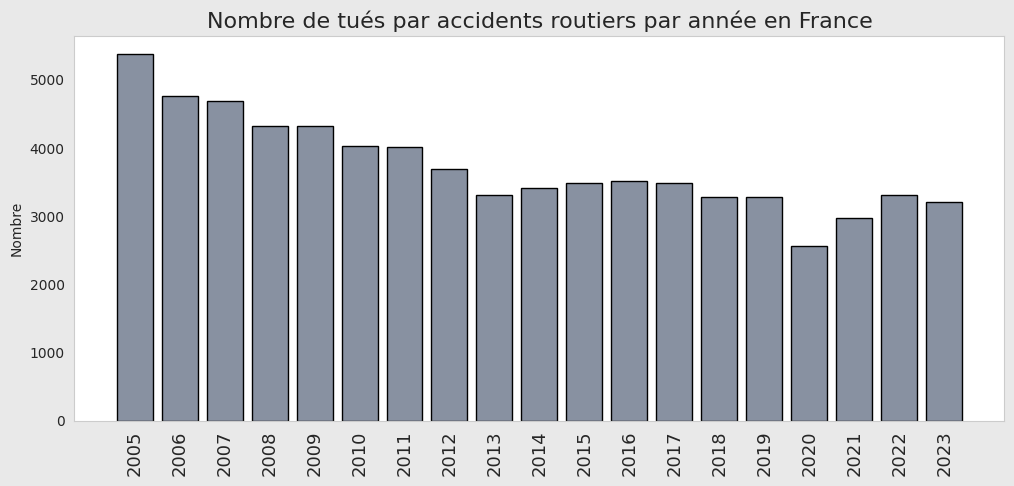

In [ ]:
label=list(df_count_accidents_nationale_Tues_Usagers_2005_to_2023.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de tués par accidents routiers par année en France",size=16)
plt.bar(range(0,len(label)),df_count_accidents_nationale_Tues_Usagers_2005_to_2023["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Dataset des personnes blessés hospitalisés en France
accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023 = accidents_nationale_Usagers_2005_to_2023[accidents_nationale_Usagers_2005_to_2023.grav == 3 ]

In [ ]:
# Nombre de personnes blessés hospitalisés en France
df_count_accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023=pd.DataFrame({'Count': accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
df_count_accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023.head(40)

,Count
an,
2005,40100
2006,40918
2007,38906
2008,35217
2009,33566
2010,30636
2011,29889
2012,27299
2013,26135


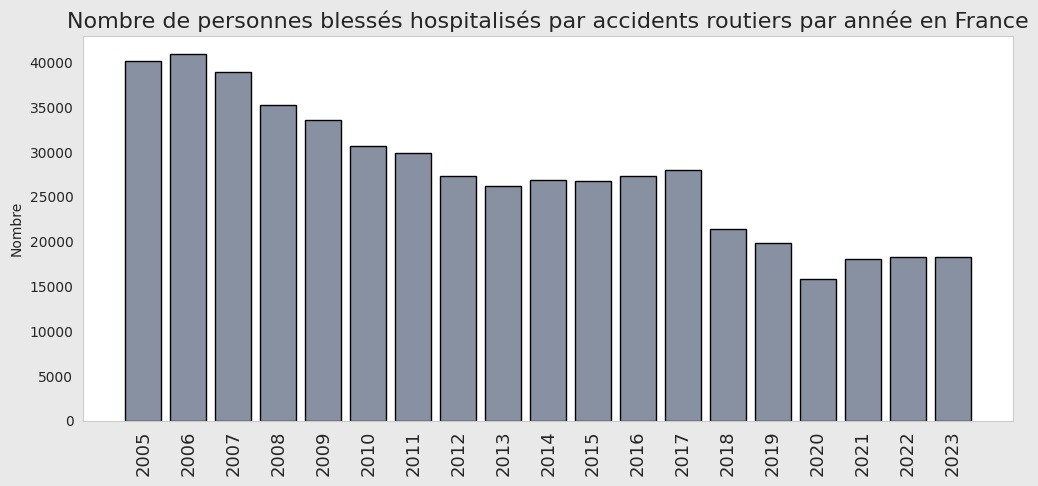

In [ ]:
label=list(df_count_accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes blessés hospitalisés par accidents routiers par année en France",size=16)
plt.bar(range(0,len(label)),df_count_accidents_nationale_Blesses_Hospitalises_Usagers_2005_to_2023["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Dataset des personnes blessés legers en France
accidents_nationale_Blesses_legers_Usagers_2005_to_2023 = accidents_nationale_Usagers_2005_to_2023[accidents_nationale_Usagers_2005_to_2023.grav == 4 ]

In [ ]:
# Nombre de personnes blessés  en France
df_count_accidents_nationale_Blesses_legers_Usagers_2005_to_2023=pd.DataFrame({'Count': accidents_nationale_Blesses_legers_Usagers_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
df_count_accidents_nationale_Blesses_legers_Usagers_2005_to_2023.head(40)

,Count
an,
2005,68420
2006,61595
2007,64731
2008,58968
2009,57681
2010,54159
2011,51727
2012,48826
2013,44724


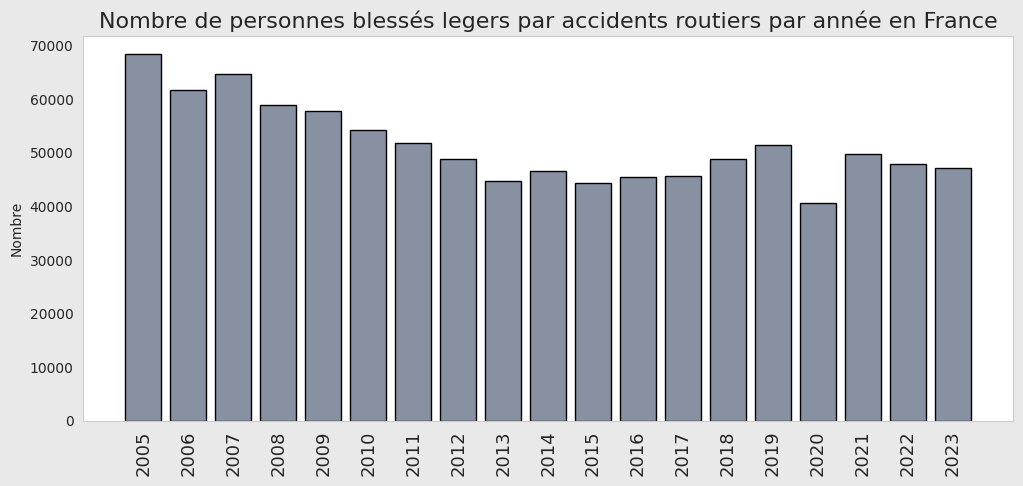

In [ ]:
label=list(df_count_accidents_nationale_Blesses_legers_Usagers_2005_to_2023.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de personnes blessés legers par accidents routiers par année en France",size=16)
plt.bar(range(0,len(label)),df_count_accidents_nationale_Blesses_legers_Usagers_2005_to_2023["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Nombre d'accidents mortels par région
df_count=pd.DataFrame({'Count': accidents_nationale_Tues_Usagers_2005_to_2023["regionName"].value_counts().sort_values(ascending = False)})
df_count.head(40)

,Count
regionName,
Occitanie,8745
Nouvelle-Aquitaine,8295
Auvergne-Rhône-Alpes,7092
Grand-Est,6425
Nord-Pas-de-Calais-Picardie,6226
Ile-de-France,6203
Provence-Alpes-Côte d'Azur,5125
Bourgogne-Franche-Comté,5022
Pays de la Loire,4265


In [ ]:
df76= accidents_nationale_Tues_Usagers_2005_to_2023[((accidents_nationale_Tues_Usagers_2005_to_2023["dep"] == 76) |(accidents_nationale_Tues_Usagers_2005_to_2023["dep"] == 27)) & (accidents_nationale_Tues_Usagers_2005_to_2023.grav == 2 )]
df76Group =  df76["an"].value_counts().sort_values(ascending = False)



In [ ]:
df27= accidents_nationale_Tues_Usagers_2005_to_2023[(accidents_nationale_Tues_Usagers_2005_to_2023["dep"] == 27) & (accidents_nationale_Tues_Usagers_2005_to_2023.grav == 2 )]
df27Group =  df27["an"].value_counts().sort_values(ascending = False)

In [ ]:
df75= accidents_nationale_Tues_Usagers_2005_to_2023[(accidents_nationale_Tues_Usagers_2005_to_2023["dep"] == 75) & (accidents_nationale_Tues_Usagers_2005_to_2023.grav == 2 )]

<Axes: xlabel='an'>

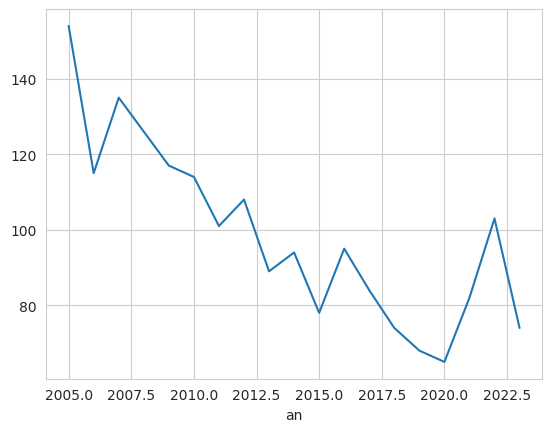

In [ ]:
df76.groupby(['an'])['dep'].count().plot()

In [ ]:
dfa = accidents_nationale_Tues_Usagers_2005_to_2023[accidents_nationale_Tues_Usagers_2005_to_2023.grav == 2]
groupby = dfa.groupby(['departmentName','an']).agg('count')
df = groupby.grav.head(20)

In [ ]:
df.head()

departmentName  an  
Ain             2019    34
                2020    43
                2021    35
                2022    45
                2023    41
Name: grav, dtype: int64

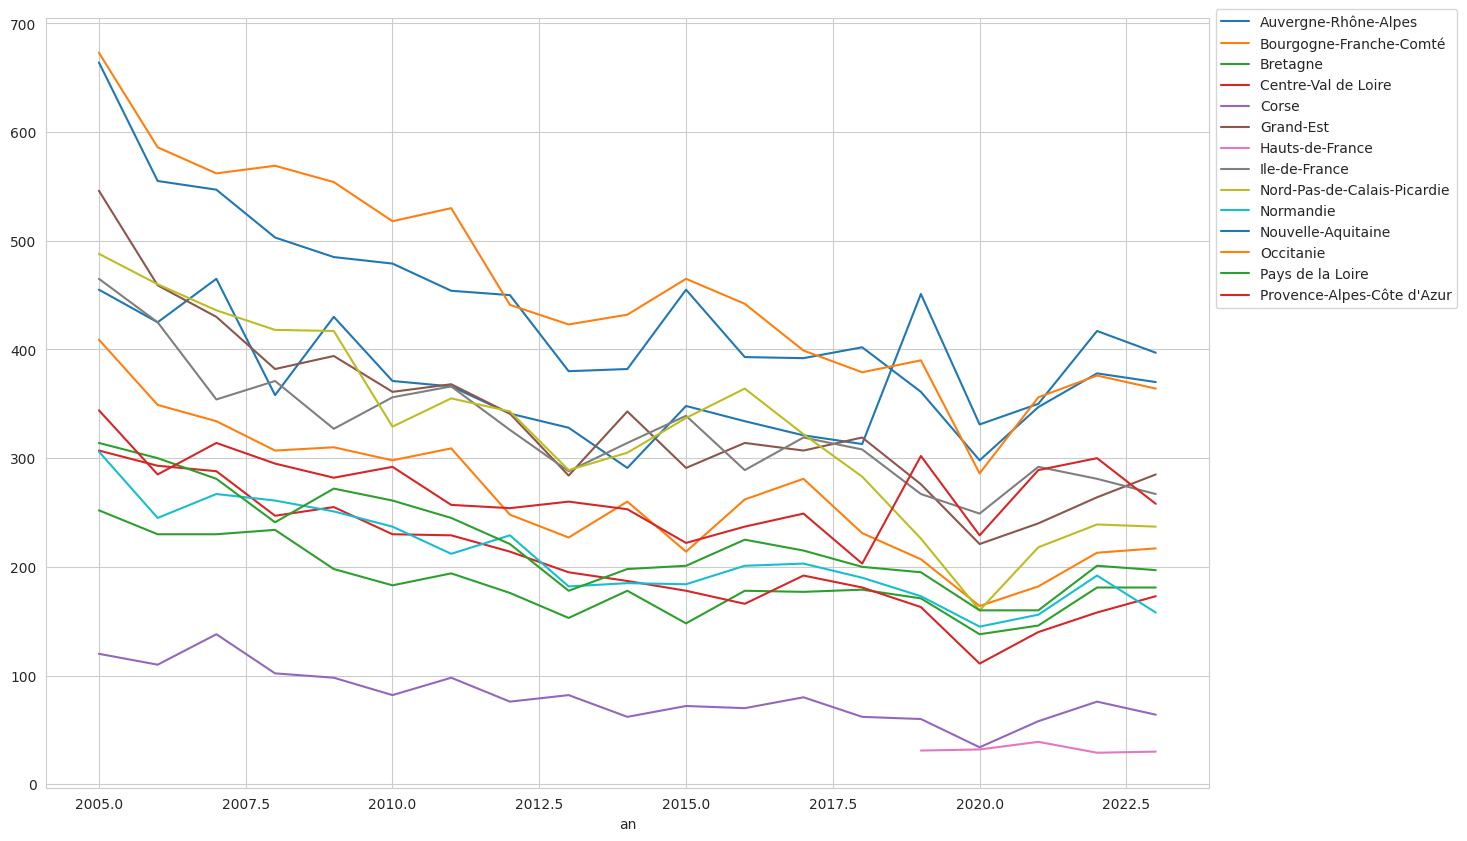

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the column to a datetime dtype
#df.Date = pd.to_datetime(df.Date).dt.date

# reshape the dataframe
#dfp = dfa.pivot_table(index='an', columns='departmentName', values='grav', aggfunc='count')
dfp = dfa.pivot_table(index='an', columns='regionName', values='grav', aggfunc='count')

# plot
ax = dfp.plot(figsize=(15, 10))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
dfp = dfa.pivot_table(index='an', columns='regionName', values='grav', aggfunc='count')

In [ ]:
dfp

regionName,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Corse,Grand-Est,Hauts-de-France,Ile-de-France,Nord-Pas-de-Calais-Picardie,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur
an,,,,,,,,,,,,,,
2005,455.0,409.0,252.0,307.0,120.0,546.0,NaN,465.0,488.0,306.0,664.0,673.0,314.0,344.0
2006,425.0,349.0,230.0,293.0,110.0,459.0,NaN,425.0,460.0,245.0,555.0,586.0,300.0,285.0
2007,465.0,334.0,230.0,288.0,138.0,430.0,NaN,354.0,436.0,267.0,547.0,562.0,281.0,314.0
2008,358.0,307.0,234.0,247.0,102.0,382.0,NaN,371.0,418.0,261.0,503.0,569.0,241.0,295.0
2009,430.0,310.0,198.0,255.0,98.0,394.0,NaN,327.0,417.0,251.0,485.0,554.0,272.0,282.0
2010,371.0,298.0,183.0,230.0,82.0,361.0,NaN,356.0,329.0,237.0,479.0,518.0,261.0,292.0
2011,366.0,309.0,194.0,229.0,98.0,368.0,NaN,366.0,355.0,212.0,454.0,530.0,245.0,257.0
2012,341.0,248.0,176.0,214.0,76.0,341.0,NaN,326.0,343.0,229.0,450.0,441.0,221.0,254.0
2013,328.0,227.0,153.0,195.0,82.0,284.0,NaN,288.0,289.0,182.0,380.0,423.0,178.0,260.0


In [ ]:
accidents_nationale_Tues_Usagers_2005_to_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70996 entries, 114 to 2672856
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num_Acc         70996 non-null  int64  
 1   jour            70996 non-null  int64  
 2   mois            70996 non-null  int64  
 3   an              70996 non-null  int64  
 4   hrmn            70996 non-null  object 
 5   lum             70996 non-null  int64  
 6   dep             70996 non-null  float64
 7   com             70995 non-null  object 
 8   agg             70996 non-null  int64  
 9   int             70996 non-null  int64  
 10  atm             70988 non-null  float64
 11  col             70995 non-null  float64
 12  adr             44449 non-null  object 
 13  lat             61521 non-null  object 
 14  long            61521 non-null  object 
 15  gps             46597 non-null  object 
 16  com_insee_temp  70996 non-null  object 
 17  com_insee       70996 non-null  

In [ ]:
df76Group.head(20)

,count
an,
2005,154
2007,135
2008,126
2009,117
2006,115
2010,114
2012,108
2022,103
2011,101


In [ ]:
x = df76.an.unique()
x
type(x)

numpy.ndarray

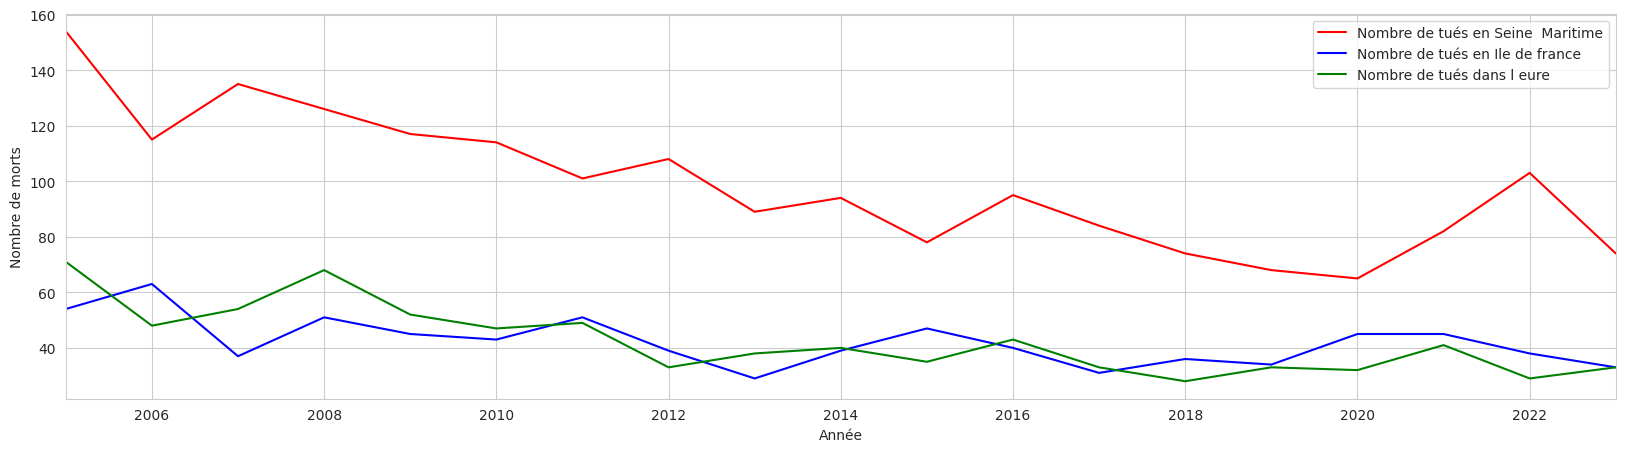

In [ ]:
fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.set_ylabel("Nombre de morts")
ax1.set_xlabel("Année")
ax1.plot(df76.groupby(['an'])['dep'].count(), "red",label='Nombre de tués en Seine  Maritime')
ax1.plot(df75.groupby(['an'])['dep'].count(), "blue",label='Nombre de tués en Ile de france')
ax1.plot(df27.groupby(['an'])['dep'].count(), "green",label='Nombre de tués dans l eure')



plt.xlim(2005, 2023)
plt.legend()
plt.show()


 Accidents pour le département de la Seine Maritime (76)

In [ ]:
Accidents_2005_to_2023_departement_76 = fusion[(fusion["dep"]== 76) ]

In [ ]:
Accidents_2005_to_2023_departement_76.shape

(15953, 21)

In [ ]:
# Nombre d'accidents en Seine Maritime par année
df_count_par_accident_76=pd.DataFrame({'Count': Accidents_2005_to_2023_departement_76["an"].value_counts().sort_index(ascending=True)})
df_count_par_accident_76.head(40)

,Count
an,
2005,1041
2006,1014
2007,1012
2008,1156
2009,1064
2010,857
2011,871
2012,812
2013,781


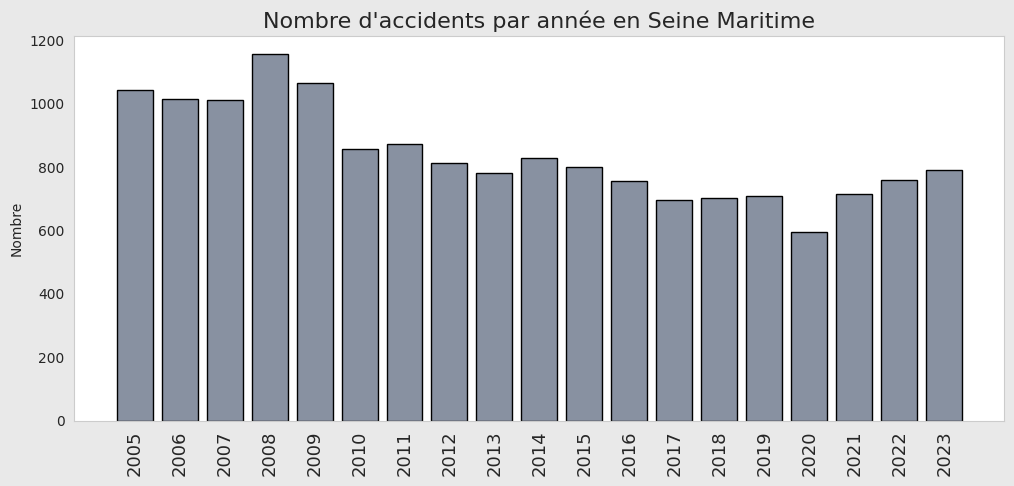

In [ ]:
label=list(df_count_par_accident_76.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre d'accidents par année en Seine Maritime",size=16)
plt.bar(range(0,len(label)),df_count_par_accident_76["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
####################################""

In [ ]:
Accidents_2005_to_2023_departement_76.head()


,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,col,adr,lat,long,gps,com_insee_temp,com_insee,departmentName,regionCode,regionName
98,202300000110,28,3,2023,16:30,1,76.0,76231,2,2,...,6.0,Rue Théodore Chennevière,"49,28606000","1,00347000",NaN,76.076231,76231,Seine-Maritime,28.0,Normandie
194,202300000214,25,3,2023,13:45,1,76.0,76351,2,1,...,3.0,PAUL VERLAINE (AVENUE),"49,50910000","0,15690000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie
244,202300000267,29,11,2023,13:15,1,76.0,76575,2,1,...,-1.0,Rue Paul Eluard,"49,39615000","1,09471000",NaN,76.076575,76575,Seine-Maritime,28.0,Normandie
246,202300000269,28,11,2023,13:00,1,76.0,76351,2,2,...,6.0,RENE COTY,"49,49754000","0,11561000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie
248,202300000271,28,11,2023,23:35,5,76.0,76351,2,1,...,6.0,Rue Commandant Abadie,"49,50123000","0,17188000",NaN,76.076351,76351,Seine-Maritime,28.0,Normandie


In [ ]:
# Chargement Usagers Global
#usagers_2005_to_2023 =pd.read_csv(pathData + 'usagers_2005_to_2023.csv', sep=',',low_memory=False)

In [ ]:
# Fusion
fusion_usagers_2005_to_2023 = Accidents_2005_to_2023_departement_76.merge(usagers_2005_to_2023, on='Num_Acc', how='inner')


In [ ]:
fusion_usagers_2005_to_2023.shape

(35587, 32)

In [ ]:
# Sauvegarde des Accidents et blesses en Seine maritime pour les années 2005 à 2023
fusion_usagers_2005_to_2023.to_csv(pathData + 'fusion_usagers_Seine_Maritime_2005_to_2023.csv', index=False)

In [ ]:
# Dataset des personnes tuées en Seine Maritime
ff = fusion_usagers_2005_to_2023[(fusion_usagers_2005_to_2023.dep == 76) & (fusion_usagers_2005_to_2023.grav == 2 )]


In [ ]:
df_count_par_accident_tues_2023_76=pd.DataFrame({'Count': ff["an"].value_counts().sort_index(ascending=True)})
df_count_par_accident_tues_2023_76.head(40)

,Count
an,
2005,83
2006,67
2007,81
2008,58
2009,65
2010,67
2011,52
2012,75
2013,51


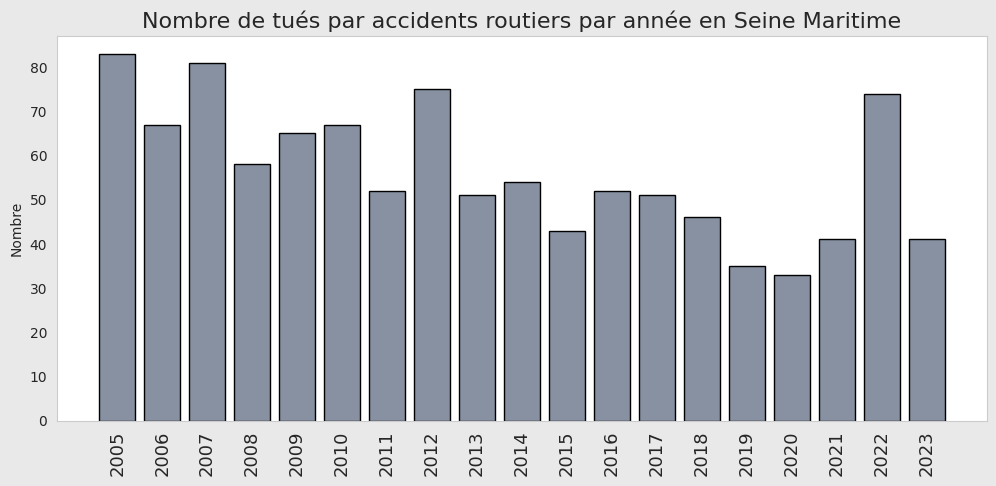

In [ ]:
label=list(df_count_par_accident_tues_2023_76.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de tués par accidents routiers par année en Seine Maritime",size=16)
plt.bar(range(0,len(label)),df_count_par_accident_tues_2023_76["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Nomnbre de bléssés hospitalisés
fusion_usagers_blesses_hospitalises_76_2005_to_2023 = fusion_usagers_2005_to_2023[(fusion_usagers_2005_to_2023.dep == 76) & (fusion_usagers_2005_to_2023.grav == 3)]


In [ ]:
df_count_par_accident_blesses_hospitalises_76=pd.DataFrame({'Count': fusion_usagers_blesses_hospitalises_76_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
df_count_par_accident_blesses_hospitalises_76.head(40)

,Count
an,
2005,632
2006,703
2007,670
2008,691
2009,631
2010,515
2011,490
2012,424
2013,410


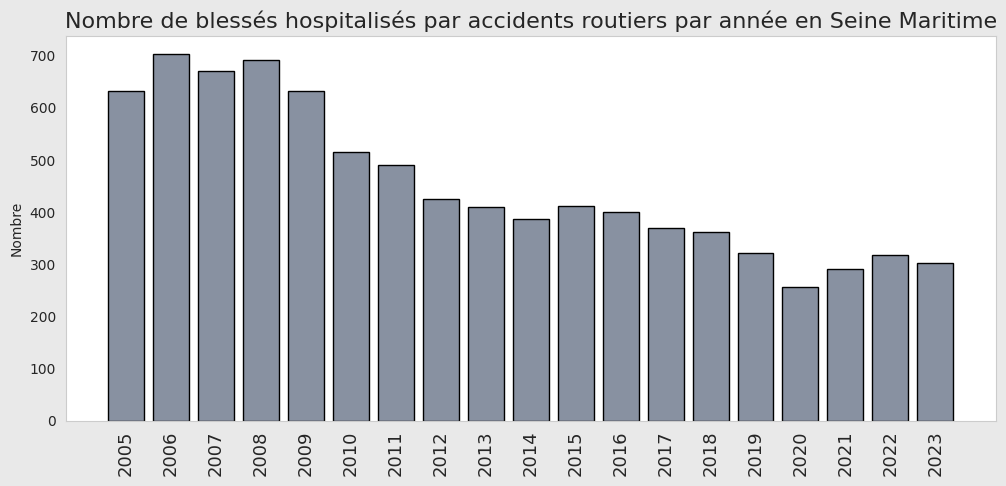

In [ ]:
label=list(df_count_par_accident_blesses_hospitalises_76.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de blessés hospitalisés par accidents routiers par année en Seine Maritime",size=16)
plt.bar(range(0,len(label)),df_count_par_accident_blesses_hospitalises_76["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()

In [ ]:
# Nomnbre de bléssés legers
fusion_usagers_blesses_leger_76_2005_to_2023 = fusion_usagers_2005_to_2023[(fusion_usagers_2005_to_2023.dep == 76) & (fusion_usagers_2005_to_2023.grav == 4 )]

In [ ]:
fusion_usagers_blesses_leger_76_2005_to_2023=pd.DataFrame({'Count': fusion_usagers_blesses_leger_76_2005_to_2023["an"].value_counts().sort_index(ascending=True)})
fusion_usagers_blesses_leger_76_2005_to_2023.head(40)

,Count
an,
2005,718
2006,640
2007,629
2008,778
2009,771
2010,613
2011,641
2012,585
2013,546


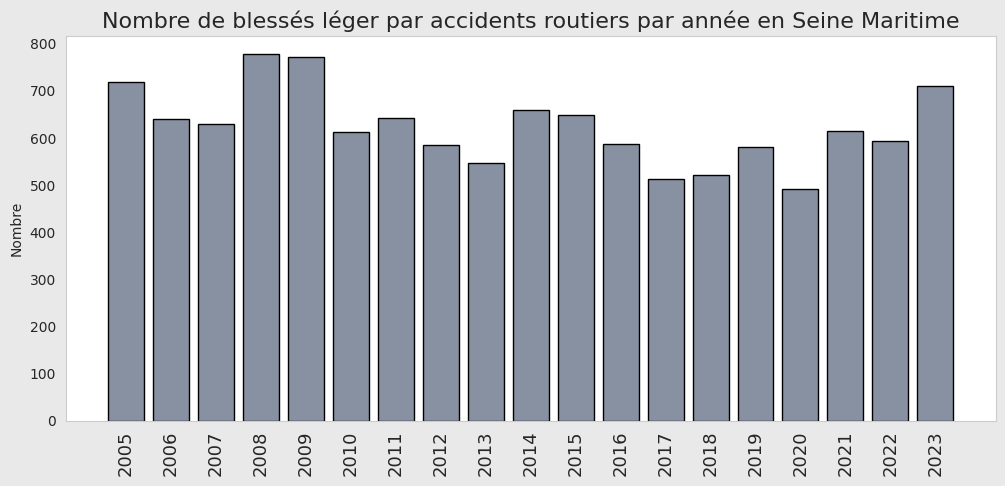

In [ ]:
label=list(fusion_usagers_blesses_leger_76_2005_to_2023.index)
fig=plt.figure(figsize=[12,5])
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)
plt.title("Nombre de blessés léger par accidents routiers par année en Seine Maritime",size=16)
plt.bar(range(0,len(label)),fusion_usagers_blesses_leger_76_2005_to_2023["Count"]
           ,edgecolor='black',color="#8891a1")
plt.xticks(range(0,len(label)),label,rotation=90,size=13)
plt.ylabel("Nombre")
plt.grid()
plt.show()